In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from autoplan.generator import Generator
from grammars.pythagorean.program import Program, PythagoreanLabels
from autoplan.dataset import build_dataset
from autoplan.models import RNN, Trainer
from tqdm import tqdm
import torch
import pandas as pd

# device = torch.device('cpu')
device = torch.device('cuda:0')

In [3]:
program_grammar = Program()
generator = Generator(grammar=program_grammar)
program, labels = generator.generate()
print(program)
print(labels)


            public class PythagoreanTheorem extends ConsoleProgram {{
                public void run() {{
                    
        print("This program finds the hypotenuse, C, of a triangle with sides A and B.");
        double a = readDouble("a:");
        double b = readDouble("b:");
        double c = Math.sqrt(Math.pow(a, 2) + Math.pow(b, 2));
        print("c:" + c);
        
                }}
            }}
        
PythagoreanLabels.UsesMathPow


In [17]:
dataset = build_dataset(
    N_train=10000, 
    N_val=1000, 
    grammar=program_grammar, 
    label_set=PythagoreanLabels)

In [22]:
trainer = Trainer(dataset, RNN, device=device)

100%|██████████| 100/100 [01:15<00:00,  1.30it/s]


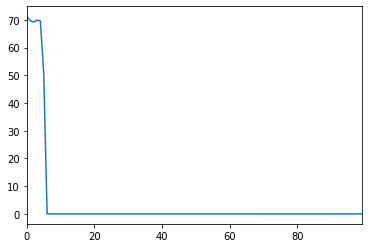

In [23]:
losses = []
for _ in tqdm(range(100)):
    losses.append(trainer.train_one_epoch())
pd.Series(losses).plot()

In [24]:
trainer.eval()

1.0